In [2]:
# NumPy is often used for numerical operations
# Pandas is commonly used for data cleaning, analysis, and exploration with tabular data 
import numpy as np
import pandas as pd

1 - Loading Data

In [5]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv") #load the dataset 
data_df.head() #show the first 5 rows from the dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


2 - Visualizing data

Matplotlib is building the font cache; this may take a moment.


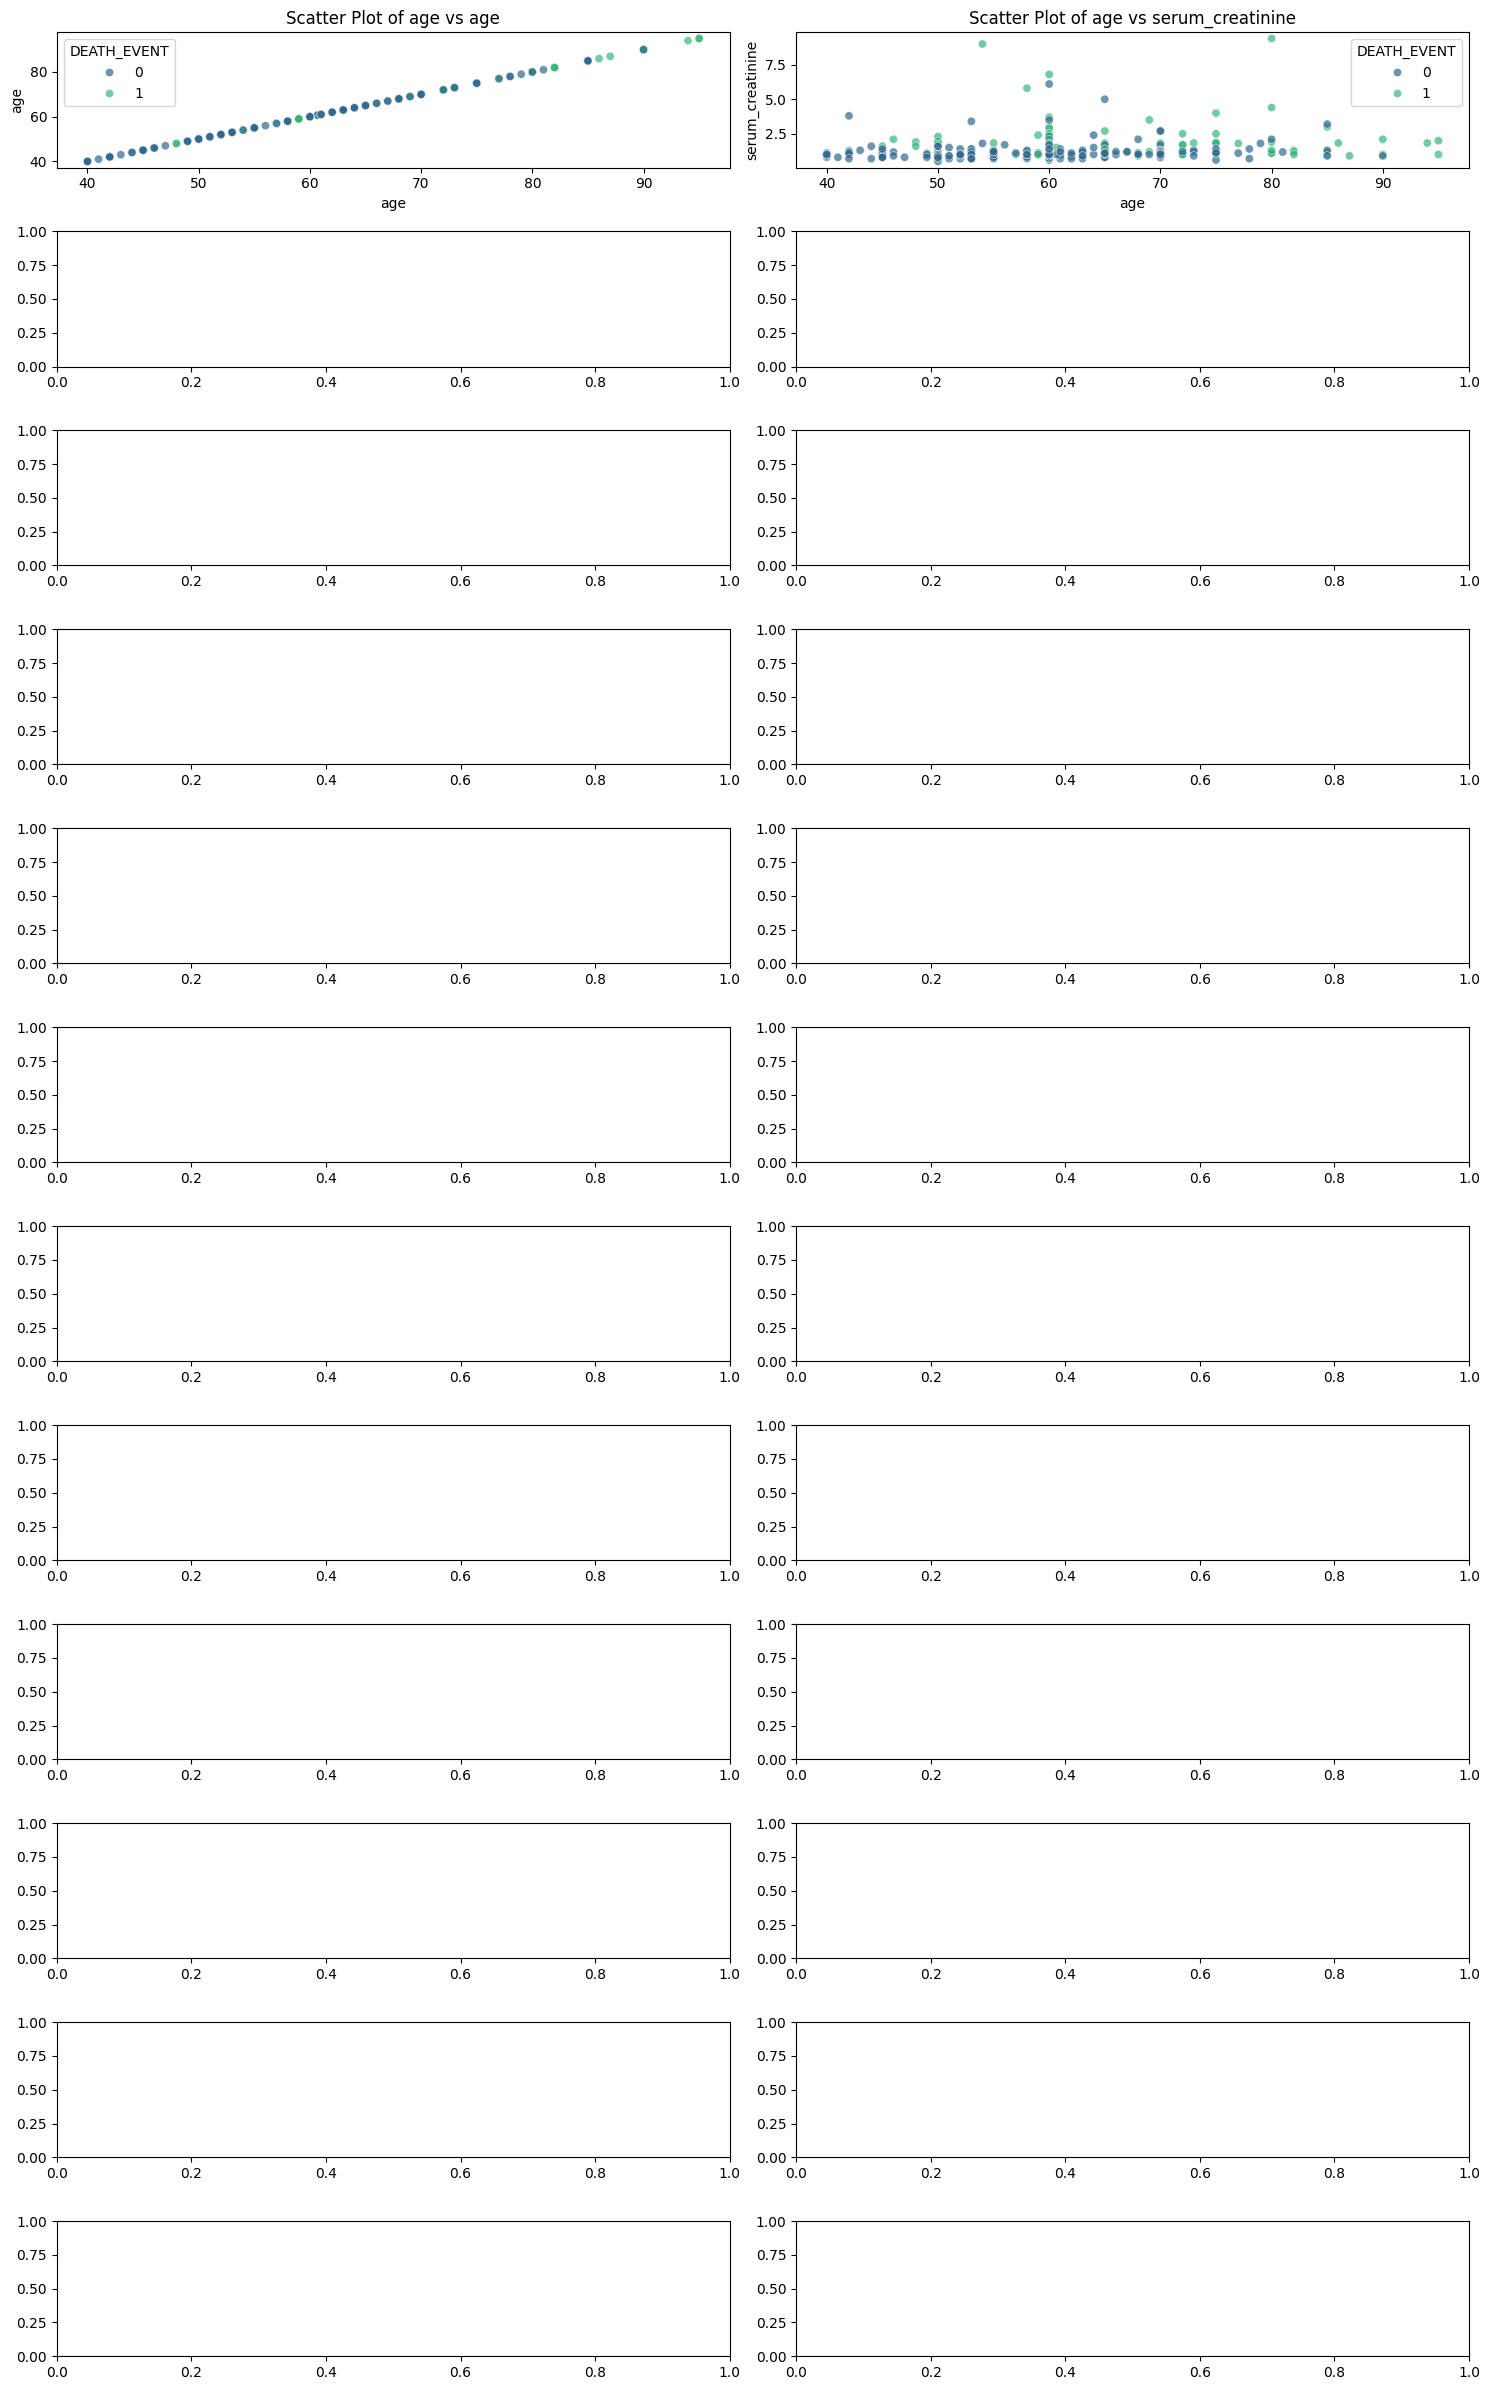

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for the scatter plot
selected_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

# Set up subplots
fig, axes = plt.subplots(nrows=len(selected_features), ncols=2, figsize=(15, 2 * len(selected_features)))

# Plot scatter plots for each feature against 'DEATH_EVENT'
for i, feature in enumerate(selected_features):
	# Scatter plot for feature vs 'DEATH_EVENT' (0)
	sns.scatterplot(x=feature, y='age', hue='DEATH_EVENT', data=data_df, ax=axes[i, 0], palette='viridis', alpha=0.7)
	axes[i, 0].set_title(f'Scatter Plot of {feature} vs age')
	axes[i, 0].set_xlabel(feature)
	axes[i, 0].set_ylabel('age')
    	
	# Scatter plot for feature vs 'DEATH_EVENT' (1)
	sns.scatterplot(x=feature, y='serum_creatinine', hue='DEATH_EVENT', data=data_df, ax=axes[i, 1], palette='viridis', alpha=0.7)
	axes[i, 1].set_title(f'Scatter Plot of {feature} vs serum_creatinine')
	axes[i, 1].set_xlabel(feature)
	axes[i, 1].set_ylabel('serum_creatinine')

	# Adjust layout
	plt.tight_layout()
	plt.show()

3 - Logistic Regression

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Select features for the scatter plot
selected_features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

# Prepare the data for Logistic Regression
X = data_df[selected_features]
y = data_df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 

# Create a Logistic Regression model
logistic_model = LogisticRegression() 

# Train the model
logistic_model.fit(X_train, y_train) 

# Evaluate the model
y_pred_logistic = logistic_model.predict(X_test)

# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
classification_rep = classification_report(y_test, y_pred_logistic)
print("\nClassification Report:")
print(classification_rep)

# Randomly sample rows from the DataFrame
random_sample = data_df[selected_features].sample(n=1,random_state=42)

# Make a prediction using Logistic Regression
pred_logistic_sample = logistic_model.predict(random_sample)
print("\nLogistic Regression Predicted DEATH_EVENT:", pred_logistic_sample[0])

Logistic Regression Accuracy: 0.80
Confusion Matrix:
[[33  2]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60


Logistic Regression Predicted DEATH_EVENT: 0


/Users/Thiago/Local_Scripts/Python/machine_learning_project/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
